# Mar23 - Accidents in France project
## Step 1: Data mining + DataViz’
### Goals
- Define the context and understand the scope of the project
- Discovering the dataset and exhaustive analysis to highlight structure, difficulties and bias
- Create 5 graphics
- Analysis of the graphs and providing a business opinion
- Validation of data manipulation or a statistical test

### Discovering dataset and analysis of structure, difficulties and bias

#### Structure

The dataset is structured in 4 tables representing the years 2005-2021 and 1 table representing 2009-2021

__*2005-2021*__

Table 1 - Features (caracteristics): Georeference, date, time, weather conditions, department, etc.

Table 2 - Places (lieux): More (!) information on road conditions, local conditions, surface conditions, etc.

Table 3 - Users (usagers): Information on the persons involved, injuries, etc.

Table 4 - Vehicles (vehicules): Information regarding the vehicles involved, direction of traffic etc.

__*2009-2021*__

Table 5 - Registered vehicles: More information on the cars

#### Difficulties / bias
- Same type of information is scattered in different tables
- Inconsistent data formatting
    - years: [9, 14, 2021] -> padding required
    - id_vehicules: includes a tricky white space (protected space) -> required regex operation to eliminate
- Inconsistent data: same variable with different content
- Mixed type variables

### Correlation matrix

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('./data/merged_tables.csv', low_memory=False, index_col=0)

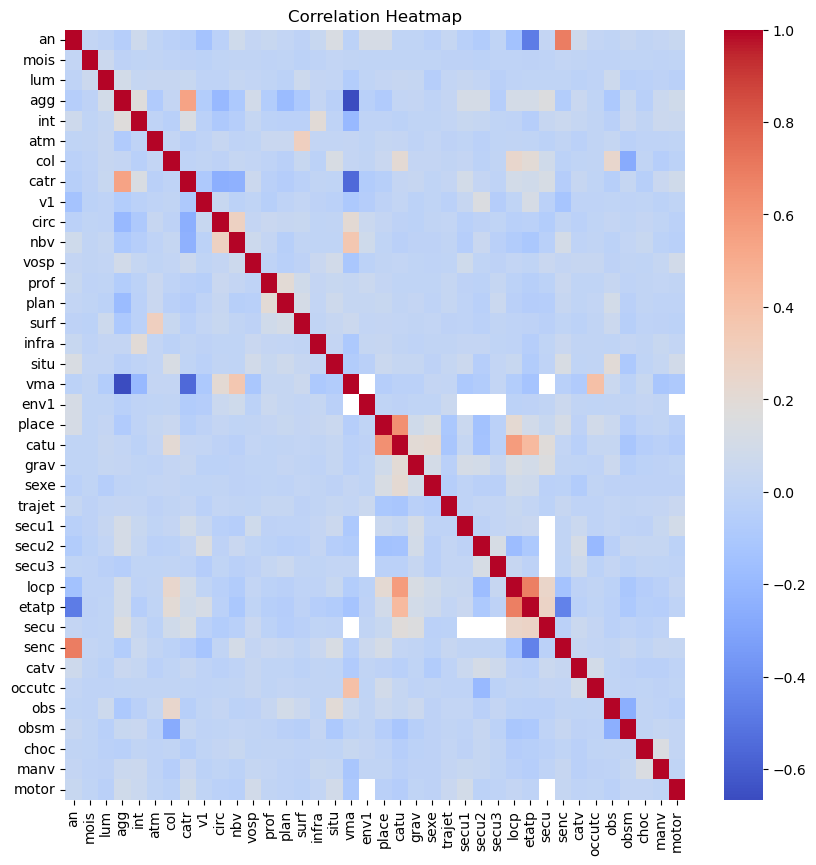

In [3]:
# Select the data for the correlation (numeric only)
columns = ['an', 'mois', 'lum', 'agg', 'int', 'atm', 'col', 
       'catr', 'v1', 'circ', 'nbv', 'vosp', 'prof', 'plan', 'surf', 'infra',
       'situ', 'vma', 'env1', 'place', 'catu', 'grav', 'sexe',
        'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'etatp',
       'secu', 'senc', 'catv', 'occutc', 'obs', 'obsm', 'choc', 'manv', 'motor']
df_select = df[columns]

# Scale the data
scaler = MinMaxScaler()
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_select), columns=columns)

# Create a correlation matrix
correlation_matrix = df_numeric_scaled.corr()
plt.figure(figsize=(10, 10))
# Generate the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

# Add a title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

#### Interpretation of the correlation

- only few stronger positive or negative correlation

- most variables are uncorrelated

In [4]:
# Iterate over the correlation matrix and print correlations between 0.99 and 0.5
for column in correlation_matrix.columns:
    within_range = correlation_matrix[column][(correlation_matrix[column] > 0.5) & (correlation_matrix[column] < 0.99)]
    if not within_range.empty:
        print(f"Correlations between 0.99 and 0.5 for '{column}':")
        print(within_range)
        print()

Correlations between 0.99 and 0.5 for 'an':
senc    0.690504
Name: an, dtype: float64

Correlations between 0.99 and 0.5 for 'agg':
catr    0.541111
Name: agg, dtype: float64

Correlations between 0.99 and 0.5 for 'catr':
agg    0.541111
Name: catr, dtype: float64

Correlations between 0.99 and 0.5 for 'place':
catu    0.616819
Name: place, dtype: float64

Correlations between 0.99 and 0.5 for 'catu':
place    0.616819
locp     0.571883
Name: catu, dtype: float64

Correlations between 0.99 and 0.5 for 'locp':
catu     0.571883
etatp    0.684249
Name: locp, dtype: float64

Correlations between 0.99 and 0.5 for 'etatp':
locp    0.684249
Name: etatp, dtype: float64

Correlations between 0.99 and 0.5 for 'senc':
an    0.690504
Name: senc, dtype: float64



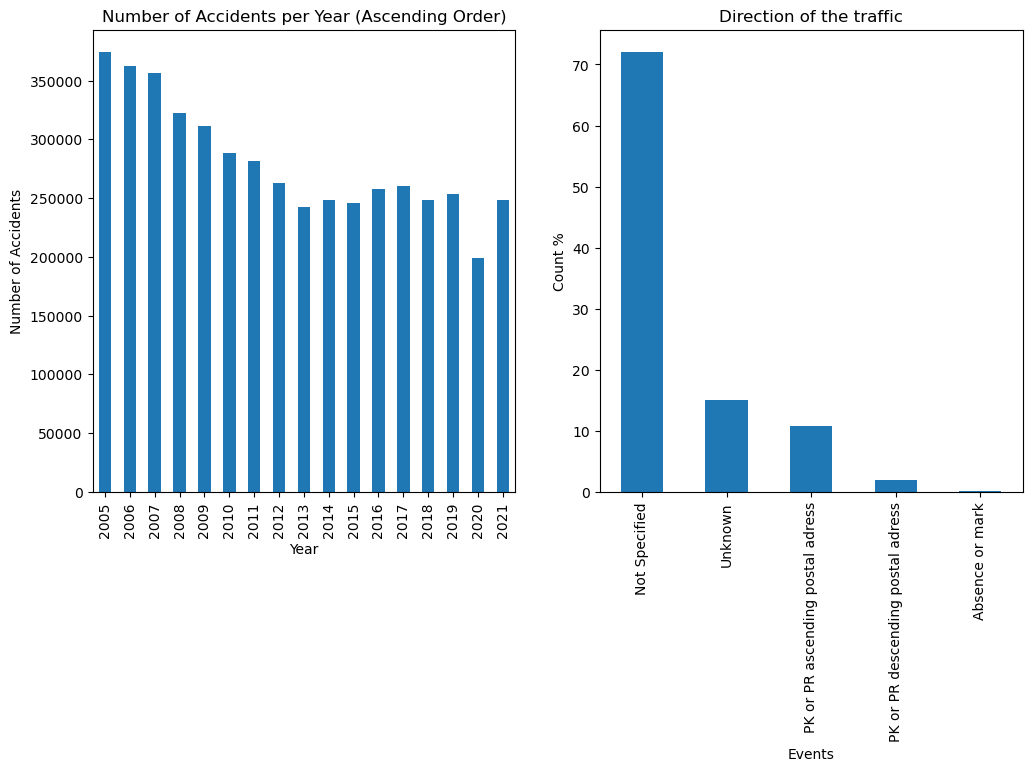

In [46]:

accident_counts = df['an'].value_counts()

accident_counts_sorted = accident_counts.sort_index()

# Create a bar plot of the accident counts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
accident_counts_sorted.plot.bar()

# Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year (Ascending Order)')



# event_counts = merged_df['col_df'].value_counts()
event_counts = df['senc'].value_counts()

# Plot the event counts
#plt.subplot(1, 2, 2)
#event_counts.plot.bar()

labels = ['Not Specified', 'Unknown', 'PK or PR ascending postal adress', 'PK or PR descending postal adress', 'Absence or mark']#, 'error1','error2', 'error3','error4']
# Add labels and title to the plot
#plt.xticks(range(len(event_counts)), labels)
#plt.xlabel('Event')
#plt.ylabel('Count')
#plt.title('SENC ')

event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(1, 2, 2)
event_percentages.plot.bar()
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Direction of the traffic')



# Display the plot
plt.show()

In [36]:
df.shape


(4763230, 58)

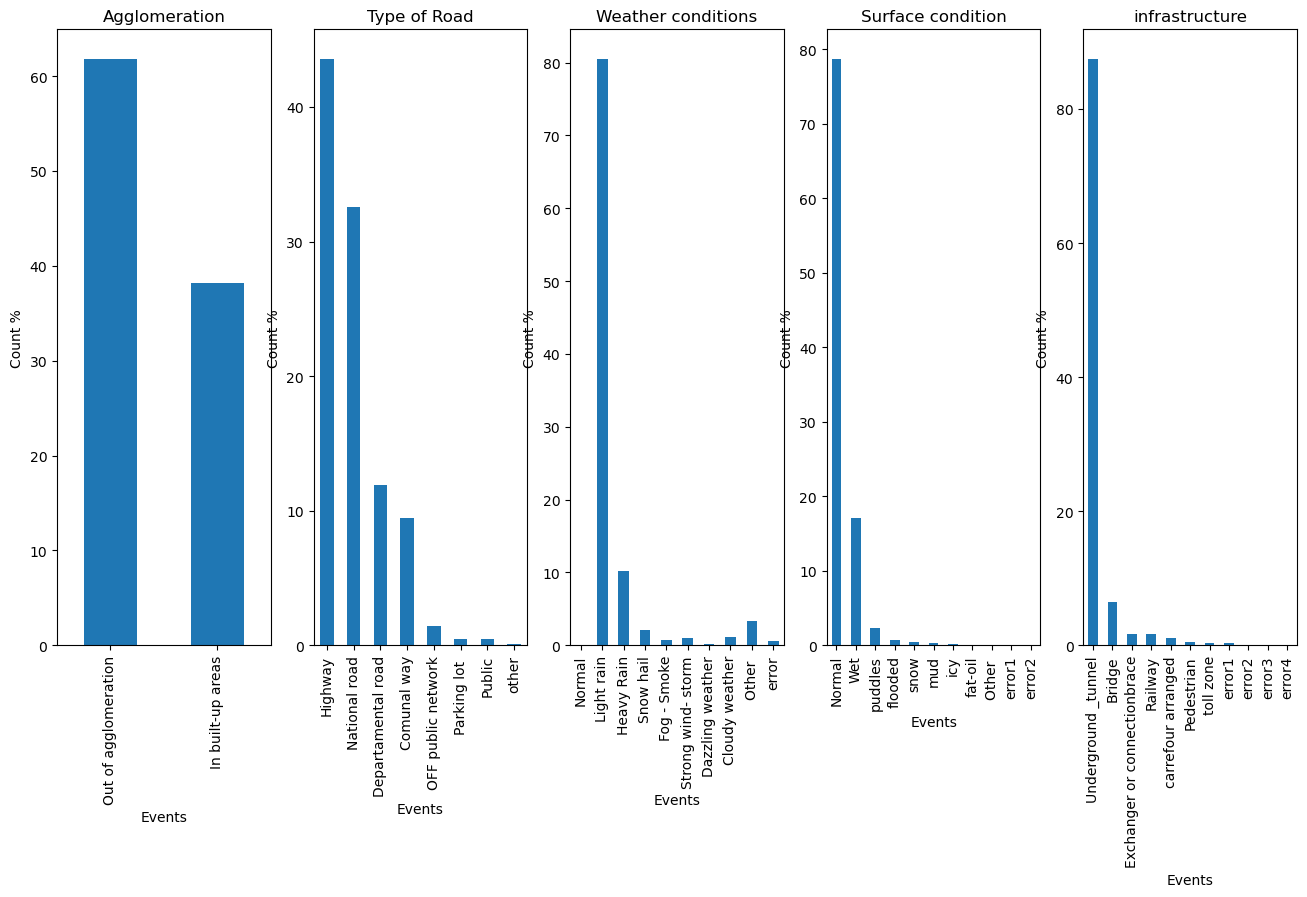

In [22]:
#agg
event_counts = df['agg'].value_counts()

# Plot the event counts
plt.figure(figsize=(16, 8))
plt.subplot(1, 5, 1)
#event_counts.plot.bar()
labels = ['Out of agglomeration', 'In built-up areas']
# Add labels and title to the plot
#plt.xticks(range(len(event_counts)), labels)
#plt.xlabel('Event')
#plt.ylabel('Count')
#plt.title('agglomeration')

event_percentages = (event_counts / event_counts.sum()) * 100
#plt.subplot(1, 2, 2)
event_percentages.plot.bar()
labels = ['Out of agglomeration', 'In built-up areas']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Agglomeration')


event_counts = df['catr'].value_counts()

# Plot the event counts
plt.subplot(1, 5, 2)
#event_counts.plot.bar()

labels = ['Highway', 'National road', 'Departamental road', 'Comunal way', 'OFF public network','Parking lot ', 'Public','other']
# Add labels and title to the plot
#plt.xticks(range(len(event_counts)), labels)
#plt.xlabel('Event')
#plt.ylabel('Count')
#plt.title('Type of Road')

event_percentages = (event_counts / event_counts.sum()) * 100
#plt.subplot(1, 2, 2)
event_percentages.plot.bar()
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Type of Road')


event_counts = df['atm'].value_counts().sort_index()
labels = ['Normal', 'Light rain', 'Heavy Rain', 'Snow hail', 'Fog - Smoke','Strong wind- storm','Dazzling weather' , 'Cloudy weather',
          'Other ', 'error']
# Plot the event counts
plt.subplot(1, 5, 3)
#event_counts.plot.bar()
#plt.xticks(range(len(event_counts)), labels)
#plt.xlabel('Event')
#plt.ylabel('Count')
#plt.title('Weather conditions');

event_percentages = (event_counts / event_counts.sum()) * 100
#plt.subplot(1, 2, 2)
event_percentages.plot.bar()
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Weather conditions')


event_counts = df['surf'].value_counts()

# Plot the event counts
plt.subplot(1, 5, 4)
#event_counts.plot.bar()

labels = ['Normal', 'Wet', 'puddles', 'flooded', 'snow','mud','icy', 'fat-oil', 'Other ', 'error1','error2']
# Add labels and title to the plot
#plt.xticks(range(len(event_counts)), labels)
#plt.xlabel('Event')
##plt.ylabel('Count')
#plt.title('Surface condition')

event_percentages = (event_counts / event_counts.sum()) * 100
#plt.subplot(1, 2, 2)
event_percentages.plot.bar()
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Surface condition')


# event_counts = merged_df['col_df'].value_counts()
event_counts = df['infra'].value_counts()

# Plot the event counts
plt.subplot(1, 5, 5)
#event_counts.plot.bar()

labels = ['Underground _tunnel', 'Bridge', 'Exchanger or connectionbrace', 'Railway', 'carrefour arranged','Pedestrian','toll zone', 'error1','error2', 'error3','error4']
# Add labels and title to the plot
#plt.xticks(range(len(event_counts)), labels)
#plt.xlabel('Event')
##plt.ylabel('Count')
#plt.title('infrastructure')

event_percentages = (event_counts / event_counts.sum()) * 100
#plt.subplot(1, 2, 2)
event_percentages.plot.bar()
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('infrastructure')


# Display the plot
plt.show()


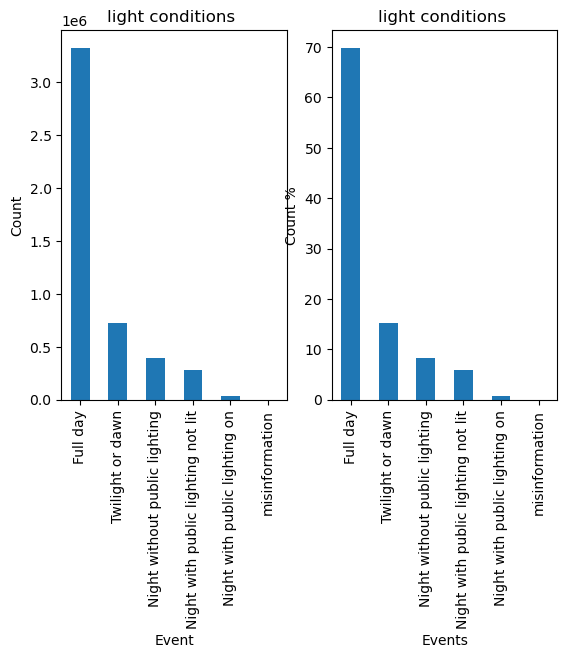

In [31]:
# After update, most duplicate variables disappeared
# event_counts = merged_df['lum_df'].value_counts()
event_counts = df['lum'].value_counts()

# Plot the event counts
plt.subplot(1, 2, 1)
event_counts.plot.bar()
labels = ['Full day', 'Twilight or dawn', 'Night without public lighting', 'Night with public lighting not lit', 'Night with public lighting on','misinformation']
# Add labels and title to the plot
plt.xticks(range(len(event_counts)), labels)
plt.xlabel('Event')
plt.ylabel('Count')
plt.title('light conditions ')

event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(1, 2, 2)
event_percentages.plot.bar()
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('light conditions ')

# Display the plot
plt.show()

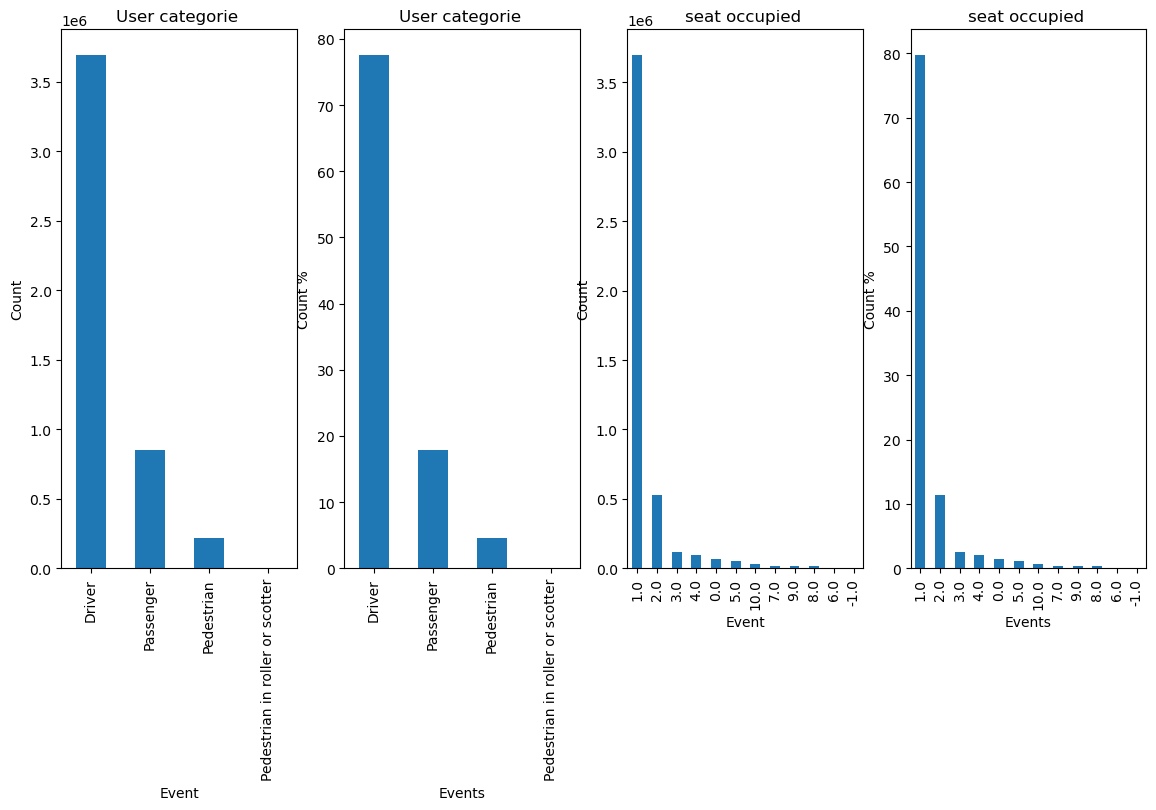

In [16]:
# event_counts = merged_df['col_df'].value_counts()
event_counts = df['catu'].value_counts()
plt.figure(figsize=(14, 7))
# Plot the event counts
plt.subplot(1, 4, 1)
event_counts.plot.bar()

labels = ['Driver', 'Passenger', 'Pedestrian', 'Pedestrian in roller or scotter']
#Add labels and title to the plot
plt.xticks(range(len(event_counts)), labels)
plt.xlabel('Event')
plt.ylabel('Count')
plt.title('User categorie ')

event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(1, 4, 2)
event_percentages.plot.bar()
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('User categorie ')

# event_counts = merged_df['col_df'].value_counts()
event_counts = df['place'].value_counts()

# Plot the event counts
plt.subplot(1, 4, 3)
event_counts.plot.bar()

#labels = ['Driver', 'Passenger', 'Pedestrian', 'Pedestrian in roller or scotter']
#Add labels and title to the plot
plt.xticks(range(len(event_counts)))
plt.xlabel('Event')
plt.ylabel('Count')
plt.title('seat occupied ')

event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(1, 4, 4)
event_percentages.plot.bar()
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)))
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('seat occupied ')


# Display the plot
plt.show()

# Display the plot
plt.show()

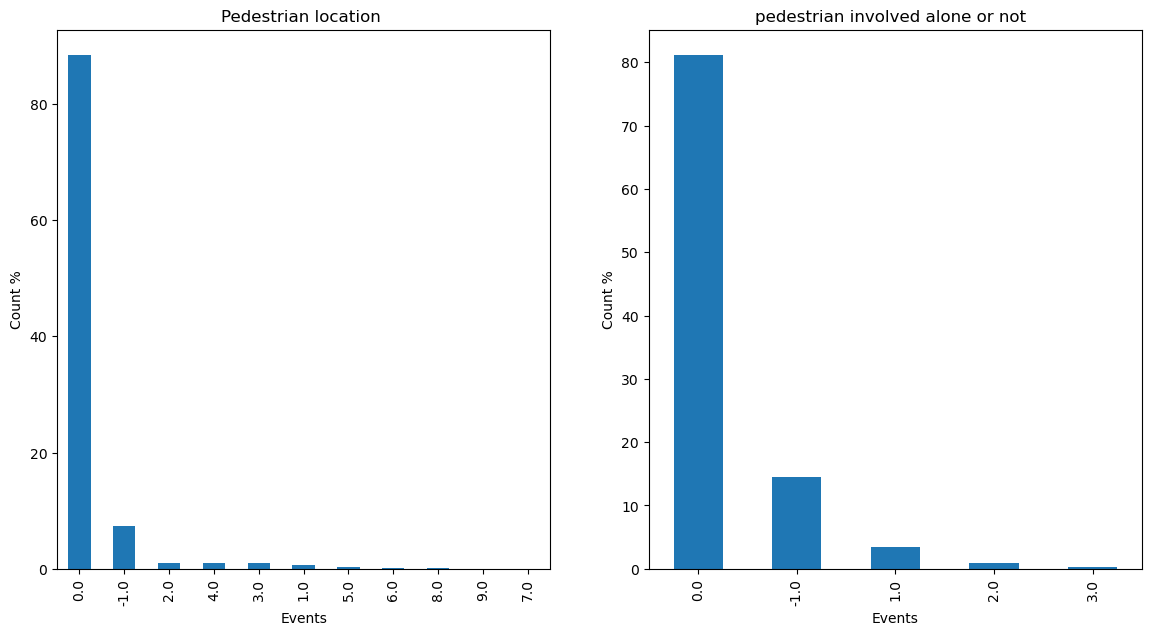

In [23]:
# event_counts = merged_df['col_df'].value_counts()
event_counts = df['locp'].value_counts()
plt.figure(figsize=(14, 7))
# Plot the event counts
plt.subplot(1, 2, 1)
#event_counts.plot.bar()

#labels = ['Driver', 'Passenger', 'Pedestrian', 'Pedestrian in roller or scotter']
#Add labels and title to the plot
#plt.xticks(range(len(event_counts)))
#plt.xlabel('Event')
#plt.ylabel('Count')
#plt.title('seat occupied ')

event_percentages = (event_counts / event_counts.sum()) * 100
#plt.subplot(1, 2, 2)
event_percentages.plot.bar()
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)))
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Pedestrian location ')
# event_counts = merged_df['col_df'].value_counts()
event_counts = df['etatp'].value_counts()

# Plot the event counts
plt.subplot(1, 2, 2)
#event_counts.plot.bar()

#labels = ['Driver', 'Passenger', 'Pedestrian', 'Pedestrian in roller or scotter']
#Add labels and title to the plot
#plt.xticks(range(len(event_counts)))
#plt.xlabel('Event')
#plt.ylabel('Count')
#plt.title('seat occupied ')

event_percentages = (event_counts / event_counts.sum()) * 100
#plt.subplot(1, 2, 2)
event_percentages.plot.bar()
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)))
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('pedestrian involved alone or not  ')

# Display the plot
plt.show()